# Task 2: Image Classification with CNNs (50%)

In this task, you'll dive into the world of Convolutional Neural Networks (CNNs) by working with the CIFAR-10 dataset, a staple in image classification challenges. Your goal is to build and evaluate two different CNN models to classify images into one of the ten categories accurately.

The dataset is availabel in pytorch and keras.

## Part 1: Custom CNN Model (20%)

- Design and train a CNN model from scratch tailored for the CIFAR-10 dataset.
- Focus on the architecture that you believe will perform best for this specific task.
- Integrate various techniques such as batch normalization, dropout, learning rate schedulers, and early stopping to improve model training. Experiment with these methods and finetune them to see how they affect training stability, convergence speed, and overall performance.

## Part 2: Transfer Learning Model (20%)

- Implement a transfer learning approach using a pre-trained model of your choice.
- Fine-tune the model on the CIFAR-10 dataset to achieve the best possible performance.

## Evaluation (10%)

Ensure that both models are robust and generalized well to unseen data.

After training both models, you will evaluate them on a provided test dataset.

Compare your models based on:
- **AUC-ROC**: How well does each model discriminate between classes?
- **Model Size**: Consider the trade-offs in model complexity.
- **Inference Speed**: Evaluate how quickly your model can predict classes for new images.

Reflect on the performance, size, and inference speed of both models. What insights can you draw from these comparisons?

### Learning Objectives

- Understand and apply CNNs for image classification.
- Explore the impact of model architecture on performance and efficiency.
- Learn the process and benefits of transfer learning in deep learning.

Remember, the key to this task is not just about achieving the highest accuracy but also understanding the strengths and limitations of different approaches in machine learning model development.

In [1]:
# torch framework itself
import torch

from torch.optim import SGD  # optimizers
from torch.optim.lr_scheduler import ReduceLROnPlateau  # learning rate schedulers
from torch.utils.data import DataLoader, TensorDataset


# image tranformations and computer vision
from torchvision import datasets, transforms

# base libraries
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

## Data Preparation

In [3]:
# You can increase these values if you've enough computational power
TRAIN_BATCH_SIZE = TEST_BATCH_SIZE = VAL_BATCH_SIZE = 128

### Data Tranforms

#### Custom

In [4]:
# put augmentations to train
train_transforms = transforms.Compose(
    [
        # tensorigy and normalize
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

# do not modify val transforms, because it will corrupt test data
val_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

# transoformations for test data
test_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

#### Pretrained

In [5]:
# put augmentations to train
resnet_train_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

# do not modify val transforms, because it will corrupt test data
resnet_val_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((224, 224)),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

# transoformations for test data
resnet_test_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((224, 224)),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

### Data Datasets

#### Custom

In [6]:
# specify path of downloaded set in root, if you've loaded it
train_dataset = datasets.CIFAR10(
    root="cifar10",
    train=True,
    transform=train_transforms,
    download=True,
)

# do the same for val part of CIFAR10, apply val_transforms
val_dataset = datasets.CIFAR10(
    root="cifar10", train=False, transform=val_transforms, download=True
)

# load given test data and targets
test_images = np.load("task_2_test_images.npy")
test_labels = np.load("task_2_test_labels.npy")

test_images = np.array(
    [test_transforms(test_image).numpy() for test_image in test_images]
)
test_dataset = TensorDataset(
    torch.from_numpy(test_images), torch.from_numpy(test_labels)
)

Files already downloaded and verified
Files already downloaded and verified


#### Pretrained

In [7]:
# specify path of downloaded set in root, if you've loaded it
resnet_train_dataset = datasets.CIFAR10(
    root="cifar10", train=True, transform=resnet_train_transforms, download=True
)

# do the same for val part of CIFAR10, apply val_transforms
resnet_val_dataset = datasets.CIFAR10(
    root="cifar10", train=False, transform=resnet_val_transforms, download=True
)

resnet_test_images: np.ndarray = np.load("task_2_test_images.npy")
resnet_test_labels: np.ndarray = np.load("task_2_test_labels.npy")

# compose to a tensor dataset with images as data and labels as targets
resnet_test_images = np.array([resnet_test_transforms(test_image).numpy() for test_image in resnet_test_images])  # type: ignore
resnet_test_dataset = TensorDataset(
    torch.from_numpy(resnet_test_images), torch.from_numpy(resnet_test_labels)
)

Files already downloaded and verified
Files already downloaded and verified


### Data Loaders

#### Custom

In [8]:
# define the loader of train data set: use train_batch_size as batch_size
train_data_loader = DataLoader(
    train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    drop_last=True,
    num_workers=2,
)

# define the loader of val data set: use test_batch_size
val_data_loader = DataLoader(
    val_dataset, batch_size=VAL_BATCH_SIZE, shuffle=True, drop_last=True, num_workers=2
)

# create test data loader for evaluation
test_data_loader = DataLoader(
    test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2,
)

#### Pretrained

In [9]:
# define the loader of train data set: use train_batch_size as batch_size
resnet_train_data_loader = DataLoader(
    resnet_train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    drop_last=True,
    num_workers=2,
)

# define the loader of val data set: use test_batch_size
resnet_val_data_loader = DataLoader(
    resnet_val_dataset,
    batch_size=VAL_BATCH_SIZE,
    shuffle=True,
    drop_last=True,
    num_workers=2,
)

# create test data loader for evaluation
resnet_test_data_loader = DataLoader(
    resnet_test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2,
)

### Show data

Plot first 4 images to perceive data

In [10]:
# map of number classes and number names
labels_maps = {
    -1: "None",
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

Cifar10 samples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


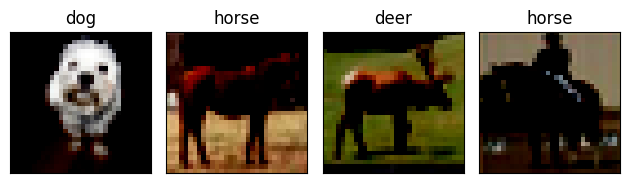

In [11]:
images, labels = next(iter(train_data_loader))

fig, axs = plt.subplots(nrows=1, ncols=4)

for i in range(4):
    ax = axs[i]

    title = labels_maps.get(labels[i].item(), -1)
    ax.set_title(title)

    ax.imshow(images[i].numpy().transpose(1, 2, 0))
    ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

plt.tight_layout()
plt.show()

Secret dataset given to us samples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


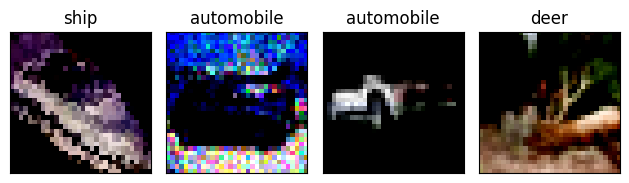

In [12]:
images, labels = next(iter(test_data_loader))

fig, axs = plt.subplots(nrows=1, ncols=4)

for i in range(4):
    ax = axs[i]

    title = labels_maps.get(labels[i].item(), -1)
    ax.set_title(title)

    ax.imshow(images[i].numpy().transpose(1, 2, 0))
    ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

plt.tight_layout()
plt.show()

## Useful Functions and Classes

In [13]:
def get_device() -> torch.device:
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    return device

In [14]:
from time import time
from tqdm import tqdm


def train(
    model,
    device: torch.device,
    train_loader: DataLoader,
    criterion,
    optimizer: torch.optim.Optimizer,
    epoch: int,
):
    model.train()
    epoch_loss = 0
    start_time = time()
    correct = 0
    iteration = 0

    bar = tqdm(train_loader)  # to print a progress bar simultaneously
    for data, target in bar:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)

        # get the index of the max log-probability
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        iteration += 1
        bar.set_postfix({"Loss": format(epoch_loss / iteration, ".6f")})

    acc = 100.0 * correct / len(train_loader.dataset)  # type: ignore
    print(f"\rTrain Epoch: {epoch}, elapsed time:{time()-start_time:.2f}s")
    return epoch_loss, acc

In [15]:
def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(
                dim=1, keepdim=True
            )  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    acc = 100.0 * correct / len(test_loader.dataset)
    return test_loss, acc

In [16]:
# Fill this class to stop when a certain value stop improving
import operator


class EarlyStopping:
    def __init__(self, tolerance=5, min_delta=0, mode="min"):
        """
        :param tolerance: number of epochs that the metric doesn't improve
        :param min_delta: minimum improvement
        :param mode: 'min' or 'max' to minimize or maximize the metric
        """

        """
        You should keep these parameters,
        define a counter of __call__ falses and the previous best value of metric
        """
        self.tolerance = tolerance
        self.min_delta = min_delta
        self.mode = mode
        self.counter = 0
        self.early_stop = False
        self.prev_metric = np.inf if mode == "min" else -np.inf

        # the correct operators after debugging
        self.operation = operator.lt if mode == "min" else operator.gt

    def __call__(self, metric) -> bool:
        """This function should return True if `metric` is not improving for
        'tolerance' calls
        """
        delta = self.prev_metric - metric  # don't need abs not to allow to increase

        if self.operation(delta, self.min_delta):
            self.counter += 1
        else:
            self.counter = 0
            self.prev_metric = metric

        if self.counter >= self.tolerance:
            self.early_stop = True

        return self.early_stop

In [17]:
def training(
    model,
    device: torch.device,
    train_data_loader: DataLoader,
    val_data_loader: DataLoader,
    criterion,
    optimizer: torch.optim.Optimizer,
    scheduler,
    early_stopping: EarlyStopping,
    epochs: int,
    train_accuracies: list[float],
    test_accuracies: list[float],
    train_losses: list[float],
    test_losses: list[float],
):
    # clear statistics lists
    train_accuracies.clear()
    test_accuracies.clear()
    train_losses.clear()
    test_losses.clear()

    # training initial values
    best_acc = 0.0

    for epoch in range(1, epochs + 1):
        # training one epoch
        train_loss, train_acc = train(
            model=model,
            device=device,
            train_loader=train_data_loader,
            criterion=criterion,
            optimizer=optimizer,
            epoch=epoch,
        )

        # update learning rate if needed
        scheduler.step(train_loss)

        # test one after on epoch
        test_loss, test_acc = test(model, device, val_data_loader, criterion)

        # keep data for plotting
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # Terminate training if loss stopped to decrease
        if early_stopping(test_loss):
            print("\nEarly stopping\n")
            break

        # deep copy the weight of model if its accuracy is the best for now
        if test_acc > best_acc:
            best_acc = test_acc
            best_model_wts = deepcopy(model.state_dict())

        # log results after each epoch
        print(f"Accuracies:\nTrain: {train_acc:.5f}%\n  Val: {test_acc:.5f}%\n")
        print(f"Losses:\nTrain: {train_loss}\n  Val: {test_loss}\n")

    # save last and best models weights
    torch.save(model.state_dict(), "model.pt")
    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), "best_model.pt")

    return model, train_accuracies, test_accuracies, train_losses, test_losses

In [18]:
def plot_acc_loss(
    epochs_range, train_accuracies, test_accuracies, train_losses, test_losses
):
    # 2 sublots and limit figsize
    _, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # accuracies
    axs[0].plot(epochs_range, train_accuracies, label="train_acc", color="blue")
    axs[0].plot(epochs_range, test_accuracies, label="val_acc", color="orange")
    axs[0].set(xlabel="epochs", ylabel="acc%")
    axs[0].set_title("Accuracy")
    axs[0].legend()

    # losses
    axs[1].plot(epochs_range, train_losses, label="train_loss", color="blue")
    axs[1].plot(epochs_range, test_losses, label="val_loss", color="orange")
    axs[1].set(xlabel="epochs", ylabel="loss")
    axs[1].set_title("Loss")
    axs[1].legend()

    return None

## Custom CNN Model

### Architecture

I took structure from lab 10 and slightly edited it.

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Build your model
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(16),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 3), nn.ReLU(), nn.BatchNorm2d(32), nn.Dropout(0.25)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        self.linear1 = nn.Sequential(
            nn.Linear(64 * 11 * 11, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.1),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)

        x = torch.flatten(x, 1)
        x = self.linear1(x)

        return F.log_softmax(x, dim=1)

Check the availability of GPU to facilitate training process

In [20]:
device = get_device()
print(f"Device: {device}")

Device: cuda


Transfer model to device

In [21]:
model = CNN().to(device)
print(model)

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.25, inplace=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear1): Sequential(
    (0): Linear(in_features=7744, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)

### Hyperparameters

In [22]:
# how many times the learning algorithm will work through the entire training dataset
epochs = 10

# loss function to evaluate model's performance and help learning
criterion = nn.CrossEntropyLoss()

# algorithm used to tune parameters
# optimizer = Adam(model.parameters(), lr=0.1)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

# how the learning rate is being adjusted
scheduler = ReduceLROnPlateau(optimizer, "min", factor=0.2, patience=5, min_lr=0.001)

# stop training when metric does not change for tolerance number of epochs using given mode
early_stopping = EarlyStopping(tolerance=5, min_delta=1, mode="min")

# var to store best model's weights
best_model_wts = deepcopy(model.state_dict())

### Train

In [23]:
model_train_accuracies, model_test_accuracies = [], []
model_train_losses, model_test_losses = [], []

In [24]:
(
    model,
    model_train_accuracies,
    model_test_accuracies,
    model_train_losses,
    model_test_losses,
) = training(
    model=model,
    device=device,
    train_data_loader=train_data_loader,
    val_data_loader=val_data_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    early_stopping=early_stopping,
    epochs=epochs,
    train_accuracies=model_train_accuracies,
    test_accuracies=model_test_accuracies,
    train_losses=model_train_losses,
    test_losses=model_test_losses,
)

  0%|          | 0/390 [00:00<?, ?it/s]

100%|██████████| 390/390 [00:16<00:00, 24.13it/s, Loss=1.264139]


Train Epoch: 1, elapsed time:16.19s
Accuracies:
Train: 54.79200%
  Val: 64.29000%

Losses:
Train: 493.0141392350197
  Val: 78.35937517881393



100%|██████████| 390/390 [00:13<00:00, 29.92it/s, Loss=0.904140]


Train Epoch: 2, elapsed time:13.04s
Accuracies:
Train: 68.07400%
  Val: 69.40000%

Losses:
Train: 352.6145211458206
  Val: 66.60367524623871



100%|██████████| 390/390 [00:12<00:00, 32.00it/s, Loss=0.738805]


Train Epoch: 3, elapsed time:12.19s
Accuracies:
Train: 73.96200%
  Val: 72.84000%

Losses:
Train: 288.1341110467911
  Val: 61.0249080657959



100%|██████████| 390/390 [00:12<00:00, 32.48it/s, Loss=0.612067]


Train Epoch: 4, elapsed time:12.01s
Accuracies:
Train: 78.32800%
  Val: 72.50000%

Losses:
Train: 238.70622700452805
  Val: 64.54899597167969



100%|██████████| 390/390 [00:11<00:00, 32.68it/s, Loss=0.502575]


Train Epoch: 5, elapsed time:11.94s
Accuracies:
Train: 82.20400%
  Val: 73.59000%

Losses:
Train: 196.00440448522568
  Val: 61.15220785140991



100%|██████████| 390/390 [00:14<00:00, 26.14it/s, Loss=0.416810]


Train Epoch: 6, elapsed time:14.92s
Accuracies:
Train: 85.15800%
  Val: 74.21000%

Losses:
Train: 162.55605340003967
  Val: 62.446273028850555



100%|██████████| 390/390 [00:13<00:00, 29.36it/s, Loss=0.321139]


Train Epoch: 7, elapsed time:13.29s
Accuracies:
Train: 88.66600%
  Val: 74.33000%

Losses:
Train: 125.24403630197048
  Val: 64.4566320180893



100%|██████████| 390/390 [00:12<00:00, 31.49it/s, Loss=0.256607]


Train Epoch: 8, elapsed time:12.39s

Early stopping



### Plot

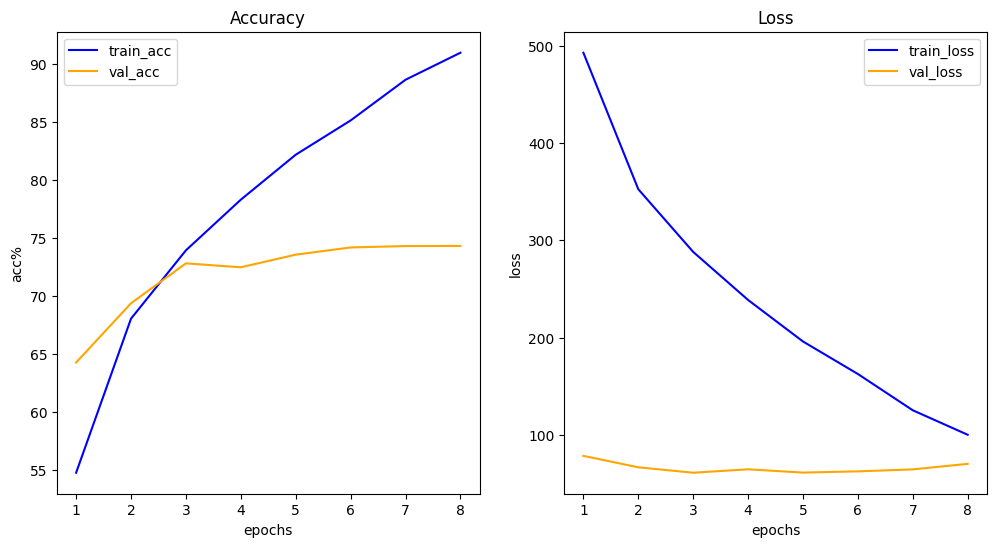

In [25]:
# in case when early stopping worked
epochs_range = range(1, len(model_train_accuracies) + 1)

plot_acc_loss(
    epochs_range,
    model_train_accuracies,
    model_test_accuracies,
    model_train_losses,
    model_test_losses,
)

### Test


Test prediction on single sample

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


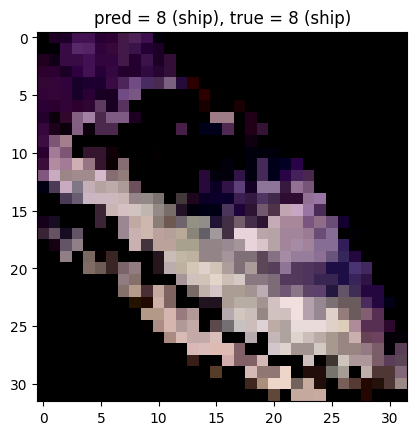

In [26]:
model.eval()
with torch.no_grad():
    for (
        images,
        labels,
    ) in test_data_loader:  # zip(test_data_loader, test_labels_loader):
        test_image, test_label = images[:1], labels[:1]
        test_image, test_label = test_image.to(device), test_label.to(device)

        output = model(test_image)
        pred = output.argmax(dim=1, keepdim=True)  # returns 2 dim tensor
        pred = pred[0][0].item()

        plt.imshow(images[0].numpy().transpose(1, 2, 0))
        plt.title(
            f"{pred = } ({labels_maps.get(pred, -1)}), true = {test_labels[0]} ({labels_maps.get(test_labels[0], -1)})"
        )

        break

The whole test dataset

In [27]:
start_time = time()
test_loss, test_acc = test(model, device, test_data_loader, criterion)
model_inference_speed = time() - start_time
print(f"{test_acc:.5}%")

63.851%


## Transfer Learning Model

### Architecure

I chose ResNet50 as best model for the first transfer learing experience

In [31]:
from torchvision.models import resnet50, ResNet50_Weights

# DEFAULT means the improved weights (more advanced recipe)
weights = ResNet50_Weights.DEFAULT
resnet = resnet50(weights=weights)

# freeze the parameters
for param in resnet.parameters():
    param.requires_grad = False

In [32]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Attach sequential head 

Modify resnet50 to suit cifar10 on input and output layers

In [33]:
# make final dense layer according to the number of classes
num_classes = 10
num_features = resnet.fc.in_features

resnet.fc = nn.Sequential(  # type: ignore
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1),
)

In [34]:
# check GPU availability again and move to device
device = get_device()
resnet = resnet.to(device)
print(f"Device: {device}")

Device: cuda


### Show amount of learnable parameters

In [35]:
pytorch_total_params = sum(p.numel() for p in resnet.parameters())
pytorch_learnable_params = sum(
    p.numel() for p in resnet.parameters() if p.requires_grad
)


print(
    f"Learnable params: {pytorch_learnable_params}  => {pytorch_learnable_params / pytorch_total_params * 100:.2f}%"
)
print(
    f"Total params: {pytorch_total_params:-11} => {pytorch_total_params / pytorch_total_params * 100:.2f}%"
)

Learnable params: 1216394  => 4.92%
Total params:    24724426 => 100.00%


In [36]:
from torchinfo import summary

summary(resnet, input_size=(TRAIN_BATCH_SIZE, 3, 32, 32), verbose=2)
None

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [128, 10]                 --
├─Conv2d: 1-1                            [128, 64, 16, 16]         (9,408)
│    └─weight                                                      └─9,408
├─BatchNorm2d: 1-2                       [128, 64, 16, 16]         (128)
│    └─weight                                                      ├─64
│    └─bias                                                        └─64
├─ReLU: 1-3                              [128, 64, 16, 16]         --
├─MaxPool2d: 1-4                         [128, 64, 8, 8]           --
├─Sequential: 1-5                        [128, 256, 8, 8]          --
│    └─0.conv1.weight                                              ├─4,096
│    └─0.bn1.weight                                                ├─64
│    └─0.bn1.bias                                                  ├─64
│    └─0.conv2.weight                                      

### Hyperparameters

In [39]:
# how many times the learning algorithm will work through the entire training dataset
epochs = 5

# loss function to evaluate model's performance and help learning
criterion = nn.CrossEntropyLoss()

# algorithm used to tune parameters
optimizer = SGD(resnet.parameters(), lr=1e-1, momentum=0.9)
# optimizer = Adam(model.parameters(), lr=1e-3)

# how the learning rate is being adjusted
# scheduler = CosineAnnealingLR(optimizer, T_max=200, verbose=True)
scheduler = ReduceLROnPlateau(optimizer, "min", factor=0.1, patience=3, min_lr=10e-5)

# stop training when metric does not change for tolerance number of epochs using given mode
early_stopping = EarlyStopping(tolerance=5, min_delta=1, mode="min")

# var to store best model's weights
best_model_wts = deepcopy(resnet.state_dict())

### Train

In [38]:
resnet_train_accuracies, resnet_test_accuracies = [], []
resnet_train_losses, resnet_test_losses = [], []

In [40]:
(
    resnet,
    resnet_train_accuracies,
    resnet_test_accuracies,
    resnet_train_losses,
    resnet_test_losses,
) = training(
    model=resnet,
    device=device,
    train_data_loader=resnet_train_data_loader,
    val_data_loader=resnet_val_data_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    early_stopping=early_stopping,
    epochs=epochs,
    train_accuracies=resnet_train_accuracies,
    test_accuracies=resnet_test_accuracies,
    train_losses=resnet_train_losses,
    test_losses=resnet_test_losses,
)

100%|██████████| 390/390 [03:07<00:00,  2.08it/s, Loss=0.740577]


Train Epoch: 1, elapsed time:187.57s
Accuracies:
Train: 74.95000%
  Val: 78.90000%

Losses:
Train: 288.82485085725784
  Val: 47.07477888464928



100%|██████████| 390/390 [03:11<00:00,  2.04it/s, Loss=0.552090]


Train Epoch: 2, elapsed time:191.49s
Accuracies:
Train: 80.82400%
  Val: 79.88000%

Losses:
Train: 215.31503209471703
  Val: 45.514909237623215



100%|██████████| 390/390 [03:07<00:00,  2.08it/s, Loss=0.487771]


Train Epoch: 3, elapsed time:187.13s
Accuracies:
Train: 82.91000%
  Val: 80.88000%

Losses:
Train: 190.2306403517723
  Val: 42.8132746219635



100%|██████████| 390/390 [03:15<00:00,  2.00it/s, Loss=0.447891]


Train Epoch: 4, elapsed time:195.45s
Accuracies:
Train: 84.25000%
  Val: 80.38000%

Losses:
Train: 174.67747896909714
  Val: 43.82504314184189



100%|██████████| 390/390 [03:09<00:00,  2.06it/s, Loss=0.413995]


Train Epoch: 5, elapsed time:189.76s
Accuracies:
Train: 85.54400%
  Val: 80.63000%

Losses:
Train: 161.4579010605812
  Val: 43.447905510663986



### Plot

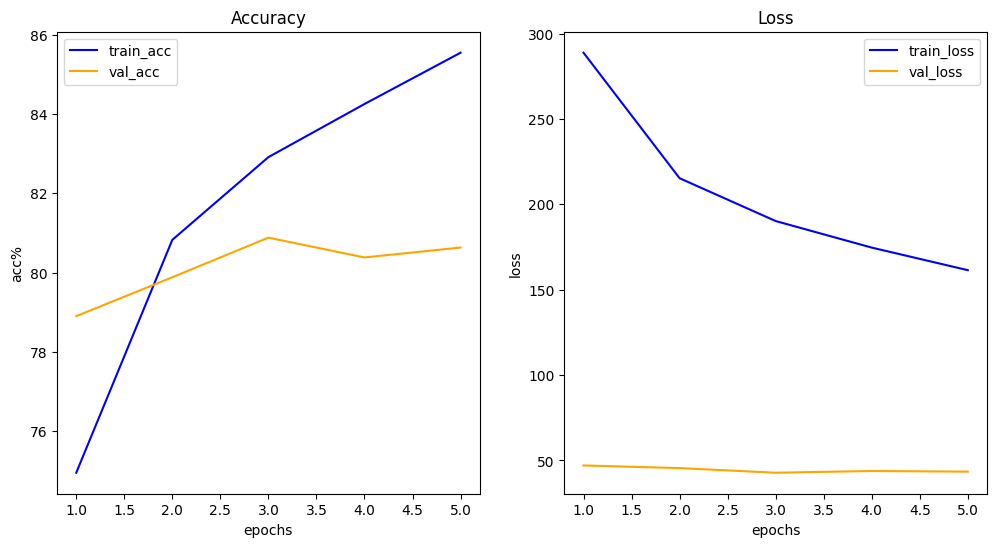

In [41]:
# in case when early stopping worked
epochs_range = range(1, len(resnet_train_accuracies) + 1)

plot_acc_loss(
    epochs_range,
    resnet_train_accuracies,
    resnet_test_accuracies,
    resnet_train_losses,
    resnet_test_losses,
)

### Test

In [42]:
start_time = time()
test_loss, test_acc = test(resnet, device, resnet_test_data_loader, criterion)
resnet_inference_speed = time() - start_time
print(f"{test_acc:.5}%")

58.98%


## Evaluation

#### ROC-AUC

Custom model turned to learn better on cifar10 and due to its relative light weight is learnt faster

In [44]:
# Assuming `model` is your trained PyTorch model and `test_loader` is your test data loader
model.eval()

# Placeholder for storing true labels and predicted probabilities
model_true_labels_list = []
model_predicted_probs_list = []

with torch.no_grad():
    for data, target in test_data_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)

        # output is a probability distribution over classes
        model_true_labels_list.extend(target.cpu().numpy())
        model_predicted_probs_list.extend(output.cpu().numpy())


# Convert lists to numpy arrays
model_true_labels: np.ndarray = np.array(model_true_labels_list)
model_predicted_probs: np.ndarray = np.array(model_predicted_probs_list)

In [45]:
# Assuming `model` is your trained PyTorch model and `test_loader` is your test data loader
resnet.eval()

# Placeholder for storing true labels and predicted probabilities
resnet_true_labels_list = []
resnet_predicted_probs_list = []

with torch.no_grad():
    for data, target in test_data_loader:
        data, target = data.to(device), target.to(device)
        output = resnet(data)

        # output is a probability distribution over classes
        resnet_true_labels_list.extend(target.cpu().numpy())
        resnet_predicted_probs_list.extend(output.cpu().numpy())


# Convert lists to numpy arrays
resnet_true_labels: np.ndarray = np.array(resnet_true_labels_list)
resnet_predicted_probs: np.ndarray = np.array(resnet_predicted_probs_list)

In [81]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

# var to store custom model data
model_tpr, model_fpr, model_roc_auc = dict(), dict(), dict()

# tuned resnet variables
resnet_tpr, resnet_fpr, resnet_roc_auc = dict(), dict(), dict()

for i in range(10):
    model_fpr[i], model_tpr[i], _ = roc_curve(model_true_labels == i, model_predicted_probs[:, i])
    model_roc_auc[i] = auc(model_fpr[i], model_tpr[i])

    resnet_fpr[i], resnet_tpr[i], _ = roc_curve(resnet_true_labels == i, resnet_predicted_probs[:, i])
    resnet_roc_auc[i] = auc(resnet_fpr[i], resnet_tpr[i])

ROC-AUC for custom model

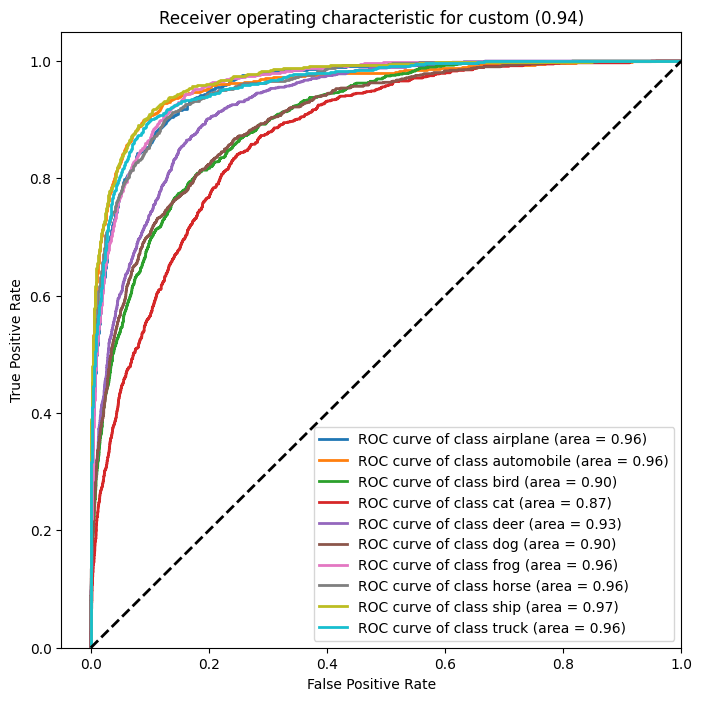

In [86]:
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.plot(
        model_fpr[i],
        model_tpr[i],
        lw=2,
        label=f'ROC curve of class {labels_maps[i]} (area = {model_roc_auc[i]:.2f})'
    )
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver operating characteristic for custom ({roc_auc_score(model_true_labels, np.exp(model_predicted_probs), multi_class="ovr"):.2f})')
plt.legend(loc="lower right")
plt.show()


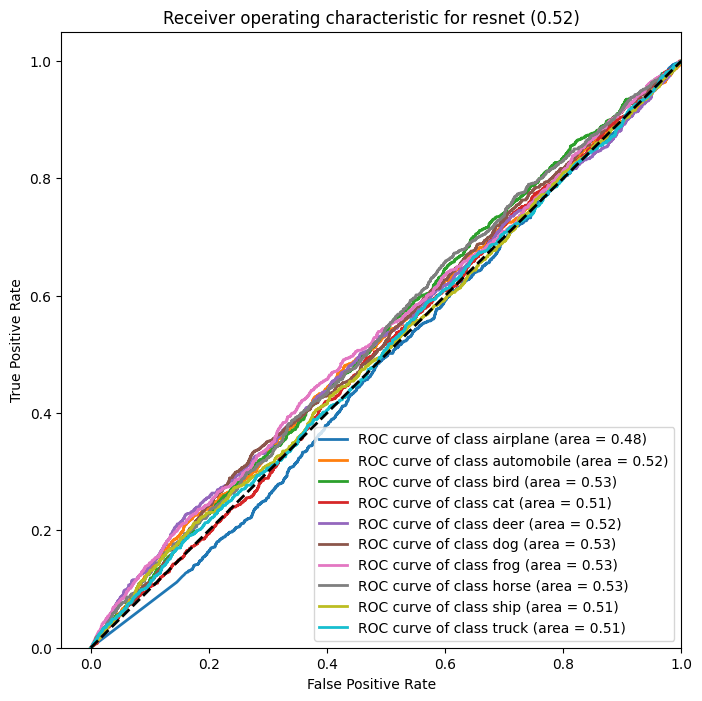

In [87]:
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.plot(
        resnet_fpr[i],
        resnet_tpr[i],
        lw=2,
        label=f'ROC curve of class {labels_maps[i]} (area = {resnet_roc_auc[i]:.2f})'
    )
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver operating characteristic for resnet ({roc_auc_score(resnet_true_labels, np.exp(resnet_predicted_probs), multi_class="ovr"):.2f})')
plt.legend(loc="lower right")
plt.show()


#### Complexity

Resnet is a larger model and it was design to classify more than 10 classes.

In [78]:
model_total_params = sum(p.numel() for p in model.parameters())
model_learnable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

resnet_total_params = sum(p.numel() for p in resnet.parameters())
resnet_learnable_params = sum(p.numel() for p in resnet.parameters() if p.requires_grad)

In [80]:
print(f"Custom model params: Total ({model_total_params}), Learnable ({model_learnable_params}), {model_learnable_params / model_total_params * 100:.2f}%")
print(f"ReNet model params: Total ({resnet_total_params}), Learnable ({resnet_learnable_params}), {resnet_learnable_params / resnet_total_params * 100:.2f}%")

Custom model params: Total (2009610), Learnable (2009610), 100.00%
ReNet model params: Total (24724426), Learnable (1216394), 4.92%


#### Inference Speed

Resnet model is significatly less efficient on inference due to its complexity of +-25 millions of params, whereas custom model is only 2 millions. 

In [43]:
print(f"Custom: {model_inference_speed:.5f} seconds")
print(f"ResNet: {resnet_inference_speed:.5f} seconds")

Custom: 4.48606 seconds
ResNet: 101.79931 seconds


## Conclusion

Despite on fact that huge pretrained models performs well, their fine-tuning won't help if the unseen data differs much.

Here the ResNet model result appeared worse because of its heavy weight and small epoch amount due to train complexity cost. 